# <font color='darkorange'> C04 - Final Model

# 0.0. Imports

In [1]:
import sys
import os

# create a path that points to the parent directory of the current directory
module_path = os.path.abspath(os.path.join('..'))

# check if the absolute path of the parent directory has been added to the system module search path
if module_path not in sys.path:
    sys.path.append(module_path)

os.chdir(module_path)

In [2]:
import re
import joblib
import warnings
import inflection
import numpy                  as np
import pandas                 as pd
import seaborn                as sns
import matplotlib.pyplot      as plt
import pipeline_class
from src                      import Starts

from sklearn.ensemble         import RandomForestRegressor
from sklearn.preprocessing    import MinMaxScaler
from sklearn.pipeline         import Pipeline
from sklearn.cluster          import KMeans

from sklearn.metrics.cluster  import silhouette_score, silhouette_samples
from sklearn.base             import BaseEstimator, TransformerMixin

/home/mars/.pyenv/versions/3.10.0/envs/pa05/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/mars/.pyenv/versions/3.10.0/envs/pa05/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/mars/.pyenv/versions/3.10.0/envs/pa05/lib/pyth

## 0.1. Helper Functions

In [3]:
starts = Starts()
starts.jupyter_settings()

## 0.2. Load Data

In [4]:
# Load Data
data_raw = pd.read_csv("data/raw/Ecommerce.csv", encoding='unicode_escape')

# Drop "Unnamed: 8" column
data_raw = data_raw.drop(columns = "Unnamed: 8")

| Column Name | Description                                            |
|-------------|--------------------------------------------------------|
| InvoiceNo   | Invoice number, a unique identifier for each transaction |
| StockCode   | Product code, a unique identifier for each product       |
| Description | Product description                                     |
| Quantity    | Quantity of products purchased in each transaction      |
| InvoiceDate | Date and time of each transaction                        |
| UnitPrice   | Unit price of each product                              |
| CustomerID  | Customer ID, a unique identifier for each customer       |
| Country     | Country of the customer                                 |


# 1.0. Model Creation

In [5]:
df1 = data_raw.copy()
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## 1.1. Rename Columns

In [6]:
# Create Pipeline to rename DataFrame
rename_pipe = Pipeline([
    ('Rename Columns', pipeline_class.RenameDataframeColumns())])

rename_pipe

Pipeline(steps=[('Rename Columns', RenameDataframeColumns())])

In [7]:
df1 = rename_pipe.fit_transform(df1)
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## 1.2. Data Cleaning

In [8]:
# Create Pipeline to rename DataFrame
data_cleaning = Pipeline([
    ('DataCleaning', pipeline_class.DataCleaning())])

data_cleaning

Pipeline(steps=[('DataCleaning', DataCleaning())])

In [9]:
df1 = data_cleaning.fit_transform(df1)
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom


In [10]:
df1.to_csv('data/customers_data/data_clean.csv', index=False)

## 1.3. Create Customers Dataframe

In [11]:
# Create Pipeline to rename DataFrame
create_customers_dataframe = Pipeline([
    ('CreateDataCleaning', pipeline_class.CreateCustomersData())])

create_customers_dataframe

Pipeline(steps=[('CreateDataCleaning', CreateCustomersData())])

In [12]:
customer_data = create_customers_dataframe.fit_transform(df1)
customer_data

,customer_id,lifetime,recency,avg_purchase_interval,frequency,number_products,nunique_products,avg_basket_size,purchase_count,charge_back_count,return_rate,avg_unt_price,avg_order_value,gross_revenue
0,17850.0,373.0,372.0,10.657143,0.093834,297.0,21.0,48.371429,35,1.0,0.028571,3.960370,151.103714,5288.63
1,13047.0,373.0,56.0,23.312500,0.042895,171.0,105.0,84.687500,16,7.0,0.437500,3.926082,193.068750,3089.10
2,12583.0,373.0,2.0,21.941176,0.045576,232.0,114.0,292.823529,17,2.0,0.117647,2.140474,389.961176,6629.34
3,13748.0,373.0,95.0,74.600000,0.013405,28.0,24.0,87.800000,5,0.0,0.000000,3.996429,189.650000,948.25
4,15100.0,373.0,333.0,62.166667,0.016086,3.0,1.0,9.666667,6,3.0,0.500000,10.950000,105.850000,635.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,13436.0,1.0,1.0,1.000000,1.000000,12.0,12.0,76.000000,1,0.0,0.000000,5.830000,196.890000,196.89
4316,15520.0,1.0,1.0,1.000000,1.000000,18.0,18.0,314.000000,1,0.0,0.000000,1.724444,343.500000,343.50
4317,13298.0,1.0,1.0,1.000000,1.000000,2.0,2.0,96.000000,1,0.0,0.000000,3.750000,360.000000,360.00
4318,14569.0,1.0,1.0,1.000000,1.000000,12.0,10.0,79.000000,1,0.0,0.000000,3.920000,227.390000,227.39


## 1.4. Pre Processing

In [13]:
# Create Pipeline to rename DataFrame
pre_processing = Pipeline([
    ('CreateDataCleaning', pipeline_class.PreProcessing())])

pre_processing

Pipeline(steps=[('CreateDataCleaning', PreProcessing())])

## 1.5. Tree Based Embedding

In [14]:
# Create Pipeline to rename DataFrame
tree_based_embedding = Pipeline([
    ('TreeBasedEmbedding', pipeline_class.TreeBasedEmbedding())])

tree_based_embedding

Pipeline(steps=[('TreeBasedEmbedding', TreeBasedEmbedding())])

## 1.6. KMeans

In [15]:
model = Pipeline([("KMeans", KMeans(init="k-means++", random_state=0, n_clusters=7))])
model

Pipeline(steps=[('KMeans', KMeans(n_clusters=7, random_state=0))])

## 1.7. Final Model

In [16]:
pipe_final = Pipeline([("Rename Columns", rename_pipe),
                       ("Data Cleaning", data_cleaning),
                       ("Create Customers Dataframe", create_customers_dataframe),
                       ("Pre Processing", pre_processing),
                       ("Tree Based Embedding", tree_based_embedding),
                       ("KMeans", model)])

pipe_final

Pipeline(steps=[('Rename Columns',
                 Pipeline(steps=[('Rename Columns',
                                  RenameDataframeColumns())])),
                ('Data Cleaning',
                 Pipeline(steps=[('DataCleaning', DataCleaning())])),
                ('Create Customers Dataframe',
                 Pipeline(steps=[('CreateDataCleaning',
                                  CreateCustomersData())])),
                ('Pre Processing',
                 Pipeline(steps=[('CreateDataCleaning', PreProcessing())])),
                ('Tree Based Embedding',
                 Pipeline(steps=[('TreeBasedEmbedding',
                                  TreeBasedEmbedding())])),
                ('KMeans',
                 Pipeline(steps=[('KMeans',
                                  KMeans(n_clusters=7, random_state=0))]))])

In [17]:
data = data_raw.copy()
# pipe_final.fit( data )

In [18]:
# joblib.dump(pipe_final, 'joblib/pipe_final.joblib')

In [19]:
pipe_final = joblib.load('joblib/pipe_final.joblib')
labels = pipe_final.predict( data )

In [20]:
customer_data["cluster"] = labels
customer_data = customer_data.query("customer_id > 0")

In [21]:
clusters_info = (customer_data.groupby('cluster').agg({
                                             'cluster': lambda x: len(x),
                                             'customer_id': lambda x: np.round((len(x))/len(customer_data),3)})
                                             .rename(columns = {'cluster':'n_customer',
                                                                'customer_id':'perc_customer'}).reset_index())

customers_means = customer_data.drop(columns='customer_id').groupby('cluster').mean().reset_index()

clusters_info = clusters_info.merge(customers_means, how='left', on='cluster')

columns = ['cluster', 'n_customer', 'perc_customer', 'gross_revenue', 'recency', 'frequency', 'number_products', 
           'nunique_products', 'return_rate', 'avg_order_value', 'avg_basket_size', 'lifetime']
clusters_info = clusters_info[columns]
clusters_info.sort_values('gross_revenue',ascending=False)

,cluster,n_customer,perc_customer,gross_revenue,recency,frequency,number_products,nunique_products,return_rate,avg_order_value,avg_basket_size,lifetime
5,5,484,0.112,8875.201178,22.190083,0.059499,420.241736,223.264463,0.142835,566.140266,321.552015,308.882231
0,0,577,0.134,2943.378423,48.644714,0.032343,132.800693,99.941075,0.120866,487.208705,307.325543,266.358752
6,6,449,0.104,1611.525702,58.472160,0.029572,87.605791,70.599109,0.123097,335.932176,210.375640,245.334076
2,2,1225,0.284,883.846163,87.791020,0.025248,44.385306,38.697143,0.090781,333.328035,204.685629,202.641633
4,4,155,0.036,504.668516,130.858065,0.028264,16.974194,16.477419,0.009140,386.976319,239.815054,156.000000
1,1,611,0.141,413.802160,134.076923,0.022035,18.021277,16.905074,0.061492,237.102389,147.396244,189.230769
3,3,819,0.190,203.100928,149.803419,0.021095,10.859585,10.177045,0.106088,110.653393,72.012903,198.185592


In [22]:
ordened_clusters = clusters_info.sort_values('gross_revenue',ascending=False).cluster.values
cluster_names = ["Insiders", "Loyals", "Potencials", "Medians", "Waitings", "Absentings", "Outs"]

map_cluster = dict(zip(ordened_clusters, cluster_names))
map_cluster

{5: 'Insiders',
 0: 'Loyals',
 6: 'Potencials',
 2: 'Medians',
 4: 'Waitings',
 1: 'Absentings',
 3: 'Outs'}

In [23]:
clusters_info.cluster = clusters_info.cluster.map(map_cluster)
customer_data.cluster = customer_data.cluster.map(map_cluster)

clusters_info.sort_values('gross_revenue',ascending=False)

,cluster,n_customer,perc_customer,gross_revenue,recency,frequency,number_products,nunique_products,return_rate,avg_order_value,avg_basket_size,lifetime
5,Insiders,484,0.112,8875.201178,22.190083,0.059499,420.241736,223.264463,0.142835,566.140266,321.552015,308.882231
0,Loyals,577,0.134,2943.378423,48.644714,0.032343,132.800693,99.941075,0.120866,487.208705,307.325543,266.358752
6,Potencials,449,0.104,1611.525702,58.472160,0.029572,87.605791,70.599109,0.123097,335.932176,210.375640,245.334076
2,Medians,1225,0.284,883.846163,87.791020,0.025248,44.385306,38.697143,0.090781,333.328035,204.685629,202.641633
4,Waitings,155,0.036,504.668516,130.858065,0.028264,16.974194,16.477419,0.009140,386.976319,239.815054,156.000000
1,Absentings,611,0.141,413.802160,134.076923,0.022035,18.021277,16.905074,0.061492,237.102389,147.396244,189.230769
3,Outs,819,0.190,203.100928,149.803419,0.021095,10.859585,10.177045,0.106088,110.653393,72.012903,198.185592


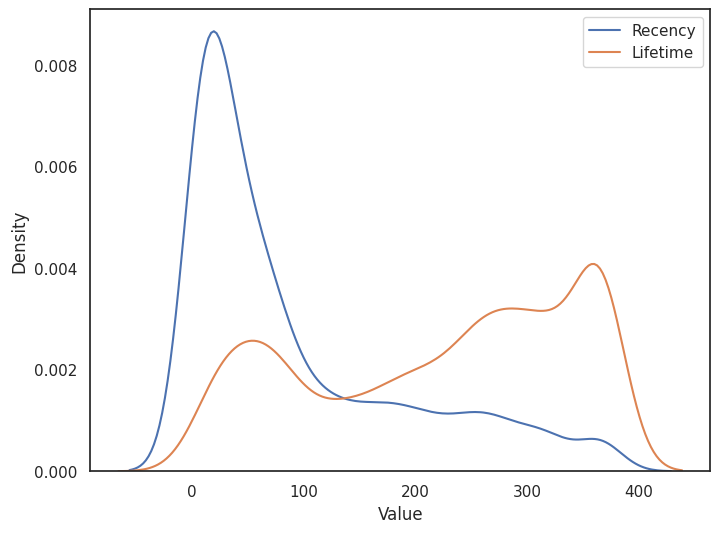

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

customer_data = customer_data.sort_values('recency')
customer_data.customer_id = customer_data.customer_id.astype(str)

fig, ax = plt.subplots(figsize=(8, 6))

sns.kdeplot(data=customer_data, x='recency', ax=ax, label='Recency')
sns.kdeplot(data=customer_data, x='lifetime', ax=ax, label='Lifetime')

ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.legend()

plt.show()


In [50]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
teste = clusters_info.copy()
cols = teste.select_dtypes(include=['int', 'float']).columns
teste[cols] = pd.DataFrame(minmax.fit_transform(teste[cols]), columns=cols)
teste

,cluster,n_customer,perc_customer,gross_revenue,recency,frequency,number_products,nunique_products,return_rate,avg_order_value,avg_basket_size,lifetime
0,Loyals,0.394393,0.395161,0.315988,0.207303,0.292871,0.297866,0.421254,0.835676,0.826709,0.942989,0.721855
1,Absentings,0.426168,0.423387,0.024296,0.876764,0.024477,0.017494,0.031574,0.391581,0.277613,0.302090,0.217362
2,Medians,1.000000,1.000000,0.078498,0.514060,0.108131,0.081893,0.133842,0.610654,0.488872,0.531671,0.305082
3,Outs,0.620561,0.620968,0.000000,1.000000,0.000000,0.000000,0.000000,0.725140,0.000000,0.000000,0.275935
4,Waitings,0.000000,0.000000,0.034774,0.851541,0.186673,0.014936,0.029567,0.000000,0.606654,0.672448,0.000000
5,Insiders,0.307477,0.306452,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,Potencials,0.274766,0.274194,0.162409,0.284313,0.220720,0.187468,0.283555,0.852362,0.494589,0.554473,0.584333


In [52]:
teste.to_csv('data/customers_data/teste.csv', index=False)

In [54]:
df1['return'] 

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2017-12-07,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2017-12-07,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2017-12-07,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2017-12-07,4.15,12680.0,France


In [55]:
df1 = df1.query('quantity <= 0')

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2016-11-29,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2016-11-29,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2016-11-29,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2016-11-29,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2016-11-29,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2017-12-07,1.95,14397.0,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2017-12-07,0.83,14397.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2017-12-07,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2017-12-07,1.25,17315.0,United Kingdom


In [63]:
df1['returned'] = df1.quantity.apply(lambda x: 1 if x <= 0 else 0)
df1.returned.value_counts()

0    396481
1      8540
Name: returned, dtype: int64

In [64]:
df1.to_csv('data/customers_data/returned.csv', index=False)